F1-score (Random Forest): 0.9685
F1-score (Logistic Regression): 0.7343


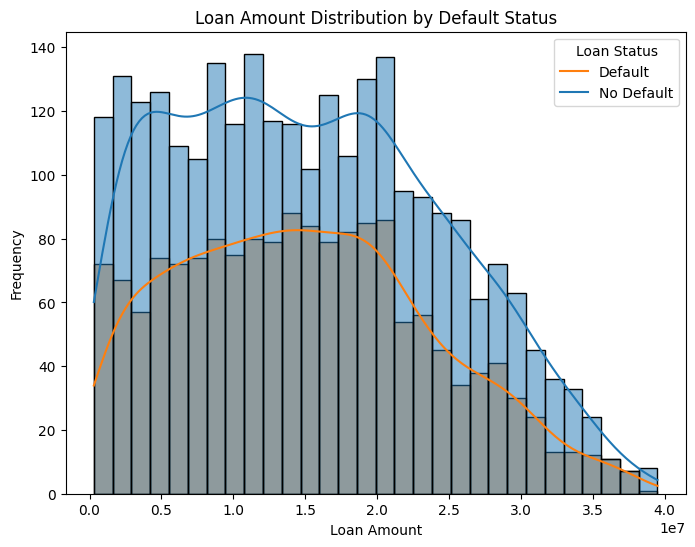

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Load dataset
file_path = "/content/loan_approval_dataset.csv"
df = pd.read_csv(file_path)

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Handling missing values by imputing median
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical variables
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"F1-score (Random Forest): {f1_rf:.4f}")
print(f"F1-score (Logistic Regression): {f1_lr:.4f}")

# Visualization: Histogram of loan amounts vs. default status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='loan_amount', hue='loan_status', kde=True, bins=30)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution by Default Status')
plt.legend(title='Loan Status', labels=['Default', 'No Default'])
plt.show()
